# Natural Language Toolkit

Für die Generierung von Tokens aus Text gibt es bereits eine Library in Python, die wir verwenden können.
Sie heißt `nltk`, siehe <https://nltk.org>.

Sie ist um einiges umfangreicher und kann nicht nur Tokens und Worthäufigkeiten aus einem Text erstellen,
sondern auch Texte semantisch analysieren.

Damit nltk für die semantische Analyse von Texten eingesetzt werden kann, müssen Sprach-spezifische Daten heruntergeladen und über die python3-REPL konfiguriert werden via

```py
>>> import nltk
>>> nltk.download() # interaktive shell zum downloaden von Corpora.
```

## Deutsch?

Deutsch ist da nicht im Downloadkatalog, aber die Uni Tübingen hat GermaNet entwickelt; allerdings nur für nichtkommerzielle Zwecke. 
Weitere Informationen zu GermaNet gibt es hier: <https://uni-tuebingen.de/fakultaeten/philosophische-fakultaet/fachbereiche/neuphilologie/seminar-fuer-sprachwissenschaft/arbeitsbereiche/allg-sprachwissenschaft-computerlinguistik/ressourcen/lexica/germanet-1/>

Zusätzlich hat dann die Uni Stuttgart ein GermanNLTK entwickelt. Da beides ausschließlich für akademische Zwecke kostenfrei verfügbar ist,
arbeiten wir erstmal mit der englischen Sprache.

## Englisch

Lass uns das Toolkit mal mit der englischen Sprache ausprobieren, am Beispiel der Rede von Martin Luther King.
Hierfür laden wir ein paar Resourcen herunter.

In [76]:
import nltk
nltk.download('english_wordnet')
nltk.download('punkt_tab')
nltk.download('maxent_ne_chunker_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package english_wordnet to
[nltk_data]     /Users/lea.rosema/nltk_data...
[nltk_data]   Package english_wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/lea.rosema/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/lea.rosema/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lea.rosema/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/lea.rosema/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [77]:
from nltk import word_tokenize

speech = """
I have a dream that my four little children
will one day live in a nation where they will
not be judged by the color of their skin but
by the content of their character.
"""

tokens = word_tokenize(speech)
print(tokens)

['I', 'have', 'a', 'dream', 'that', 'my', 'four', 'little', 'children', 'will', 'one', 'day', 'live', 'in', 'a', 'nation', 'where', 'they', 'will', 'not', 'be', 'judged', 'by', 'the', 'color', 'of', 'their', 'skin', 'but', 'by', 'the', 'content', 'of', 'their', 'character', '.']


Desweiteren kann nltk die Tokens taggen:

In [78]:
tagged_tokens = nltk.pos_tag(tokens)

print(tagged_tokens)

[('I', 'PRP'), ('have', 'VBP'), ('a', 'DT'), ('dream', 'NN'), ('that', 'IN'), ('my', 'PRP$'), ('four', 'CD'), ('little', 'JJ'), ('children', 'NNS'), ('will', 'MD'), ('one', 'CD'), ('day', 'NN'), ('live', 'VB'), ('in', 'IN'), ('a', 'DT'), ('nation', 'NN'), ('where', 'WRB'), ('they', 'PRP'), ('will', 'MD'), ('not', 'RB'), ('be', 'VB'), ('judged', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('color', 'NN'), ('of', 'IN'), ('their', 'PRP$'), ('skin', 'NN'), ('but', 'CC'), ('by', 'IN'), ('the', 'DT'), ('content', 'NN'), ('of', 'IN'), ('their', 'PRP$'), ('character', 'NN'), ('.', '.')]


In [79]:
entities = nltk.chunk.ne_chunk(tagged_tokens)

print(entities)

(S
  I/PRP
  have/VBP
  a/DT
  dream/NN
  that/IN
  my/PRP$
  four/CD
  little/JJ
  children/NNS
  will/MD
  one/CD
  day/NN
  live/VB
  in/IN
  a/DT
  nation/NN
  where/WRB
  they/PRP
  will/MD
  not/RB
  be/VB
  judged/VBN
  by/IN
  the/DT
  color/NN
  of/IN
  their/PRP$
  skin/NN
  but/CC
  by/IN
  the/DT
  content/NN
  of/IN
  their/PRP$
  character/NN
  ./.)


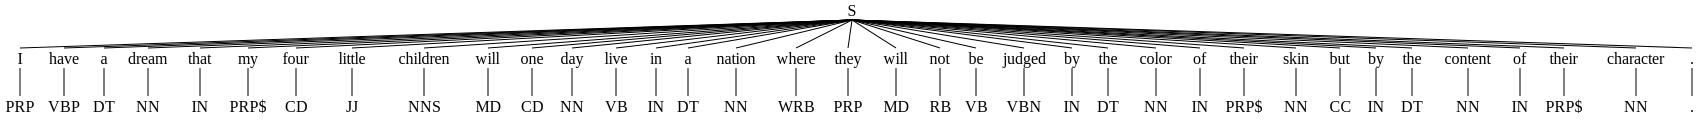

In [80]:
def to_svg(tree):
    return tree._repr_svg_()

display(SVG(to_svg(entities)))

## Ein n-gram-Sprachmodell mit NLTK

Mithilfe des NLTK können wir ebenfalls ein n-gram-Sprachmodell aufbauen:

In [81]:
from nltk import word_tokenize
from collections import defaultdict
import random

reader = open("data/poe-the-tell-tale-heart.txt")
story = reader.read()

tokens = word_tokenize(story)

# Build a trigram model 
model = defaultdict(list)
for i in range(len(tokens)-2):
    key = (tokens[i], tokens[i+1])
    next_word = tokens[i+2]
    model[key].append(next_word)

# Generate text
seed = random.choice(list(model.keys()))
output = [seed[0], seed[1]]

# generate 50 words
for _ in range(50):  
    next_word = random.choice(model.get((output[-2], output[-1]), [random.choice(tokens)]))
    output.append(next_word)

print(" ".join(output))


although he neither saw nor heard — to feel — although he neither saw nor heard — to feel — although he neither saw nor heard — to feel the presence of my confidence , I found the eye always closed ; and so by degrees — very , very patiently ,


Das ist noch nicht wirklich besser wie in unserem Ansatz im vorherigen Notebook. Wir können es ein wenig smarter machen, da unser NLTK-basierter Tokenizer bereits klassifizieren kann, ob ein Token ein Subjekt, ein Verb, ein Adjektiv, ein Objekt, ein Satzzeichen oder etwas anderes ist.

Fügen wir diese Information zu unserem Modell hinzu, können wir mit einem 4-gram-Modell Texte generieren, die schon besser sind, und (teilweise) sogar Sinn ergeben.

In [2]:
import numpy as np
from nltk import word_tokenize, pos_tag
from collections import defaultdict, Counter
import random

reader = open("data/poe-the-tell-tale-heart.txt")
story = reader.read()

paras = story.split('\n\n')

tokens = []
tagged = []

for para in paras:
    para_tokens = word_tokenize(para)
    tagged += pos_tag(para_tokens)  # returns list of (word, POS)
    tokens += para_tokens

# --- Build POS-aware 4-gram model + 2-gram fallback ---
model_4gram = defaultdict(list)
model_3gram = defaultdict(list)
model_2gram = defaultdict(list)
starts = []  # valid sentence starters (avoid punctuation)

punct = {".", "!", "?"}

for i in range(len(tagged) - 3):

    (w1, p1) = tagged[i]
    (w2, p2) = tagged[i + 1]
    (w3, p3) = tagged[i + 2]
    (w4, p4) = tagged[i + 3]

    key_4gram = (w1, p1, w2, p2, w3, p3)
    model_4gram[key_4gram].append((w4, p4))

    # Also build 2-gram fallback
    key_3gram = (w1, p1, w2, p2)
    model_3gram[key_3gram].append((w3, p3))
    key_3gram = (w2, p2, w3, p3)
    model_3gram[key_3gram].append((w4, p4))
    
    key_2gram = (w1, p1)
    model_2gram[key_2gram].append((w2, p2))
    key_2gram = (w2, p2)
    model_2gram[key_2gram].append((w3, p3))
    key_2gram = (w3, p3)
    model_2gram[key_2gram].append((w4, p4))

    # build list of good sentence starters
    if w1[0].isupper() and w1 not in punct:
        starts.append(((w1,p1), (w2, p2), (w3, p3)))

# --- Text generation ---
def generate(max_words=100, temperature=1.0):

    # pick a clean sentence start
    w1, w2, w3 = random.choice(starts)
    output = [w1, w2, w3]

    for _ in range(max_words):
        last1, last2, last3 = output[-3], output[-2], output[-1]

        key_4gram = (last1[0], last1[1], last2[0], last2[1], last3[0], last3[1])
        key_3gram = (last2[0], last2[1], last3[0], last3[1])
        key_2gram = (last3[0], last3[1])

        # Try 4-gram first, fallback to trigram/bigram
        options = model_4gram.get(key_4gram) or []
        if len(options) <= 1:
            options += options + options 
            options += model_3gram.get(key_3gram) or []
        if len(options) <= 1:
            options += options + options
            options += model_2gram.get(key_2gram) or []
        if len(options) == 0:
            output.append((".", "."))
            break

        # Count occurrences of each word
        word_counts = Counter(options)
        words = list(word_counts.keys())
        counts = np.array([word_counts[w] for w in words], dtype=float)

        # Apply temperature scaling
        counts = np.power(counts, 1.0 / temperature)
        probs = counts / counts.sum()

        next_word_idx = np.random.choice(range(len(words)), p=probs)
        next_word = words[int(next_word_idx)]
        # ---- RULES ----

        # avoid punctuation at sentence start
        if output[-1][0] in punct and next_word[0] in punct:
            continue

        output.append(next_word)

        # force sentence break logic
        if next_word[0] in punct:
            break

    sentence = ""
    more_punct = {',', ':', ';'}
    for token in output:
        if not token[0] in punct and not token[0] in more_punct:
            sentence += " "
        sentence += token[0]

    return sentence

In [144]:
print(generate(100))

 And now have I not told you that what you mistake for madness is but over acuteness of the men — but the noise steadily increased.


Wir generieren Sätze, die (meist) aussehen wie grammatikalisch korrektes Englisch :)

Wir nutzen für die Ermittlung des Folge-Wortes einen Kontext von 3 Wörtern und haben ihm programmatisch beigebracht, dass Satzzeichen wie `.`, `?` oder `!` den Satz beenden. 

Eine Garantie, dass der Satz auch Sinn ergibt, gibt es hier nicht.

Ein weiteres Problem ist, dass die Varianz nicht so gut ist. Es kommt vor, dass der Algorithmus Sätze 1 zu 1 aus dem Text übernimmt. 

Um die Varianz etwas zu vergrößern, wird, wenn es nur ein mögliches Folgewort gibt, ein verkleinerter Kontext verwendet. Das erhöht den Bullshit-Faktor jedoch nicht unwesentlich, daher gewichten wir die Folgewörter mit dem größerem Kontext etwas höher.

Können wir unser Modell noch kreativer machen?

## Die "Temperatur" eines Sprachmodells

In Sprachmodellen beeinflusst die Temperatur eines Modells die Satzvervollständigung. Dieser Parameter steuert, wie vorhersehbar das Modell ist.

Niedrige Werte führen zu vorhersehbaren bis deterministischen Antworten. Höhere Were erhöhen die Kreativität, aber damit auch das Risiko für Halluzinationen.

Nachfolgend probieren wir unsere Generator-Funktion einmal mit hoher Temperatur (kreativ) und einmal mit niedriger Temperatur aus.

In [22]:
print(generate(max_words=100, temperature=2000))

 And every night, about midnight, when the day broke, I went to work!


In [11]:
print(generate(max_words=100, temperature=0.1))

 I am. And now a new anxiety seized me — the sound would be heard by a neighbor during the night; suspicion of foul play had been aroused; information had been lodged at the police office, and I fancied a ringing in my ears: but still they sat and still chatted.


Mit dem Parameter 0.1 ist das Sprachmodell besonders "konservativ" gewichtet. Die Wahrscheinlichkeit ist höher, dass der generierte Satz Sinn ergibt. Allerdings ist die Varianz geringer und das Modell ist deterministischer. Große Teile zweiten Satzes wurden 1 zu 1 aus der Kurzgeschichte übernommen (z.B. "And now a new anxiety seized me — the sound would be heard by 
a neighbor").

Eine hohe Temperatur sorgt für kreativere Ergebnisse und hält sich weniger fest an die Worthäufigkeiten. Es kann aber damit auch sein, dass der generierte Satz auch weniger Sinn ergibt (wobei um Mitternacht zu arbeiten vielleicht schon Sinn ergibt, wenn man Vampir, Programmierer oder beides ist). 